In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import time 
from konlpy.tag import Okt
import pandas as pd
import re
from tqdm import trange, notebook

In [8]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

In [15]:
import pandas as pd

In [16]:
train_data = pd.read_csv('../data/코로나_이후_명지.csv')

In [17]:
train_data

,Unnamed: 0,recommend,comment,date,title,content
0,0,18,8,01/24 23:07,코로나 바이러스 우한 폐렴 있잖아,우리학교 중국인 엄청 많은데 나만 걱정돼 ㄷㄷㄷㄷ ㅠㅠ
1,1,0,5,01/26 10:00,코로나때문에,알바하는데 손님없다 ㅋㅋㅋㅋㅋㅋ
2,2,0,6,01/26 10:27,코로나 예방수칙,감염루트가 비말감염 인지라 마스크만 잘 쓰고 손만 잘 씻으면 예방하는게 그다지 어렵...
3,3,2,1,01/26 15:26,충남도 여행사 관광객에 양해 구하고 취소요청,홍성 연합뉴스 양영석 기자 우한 폐렴 으로 불리는 신종 코로나바이러스 확산...
4,4,0,9,01/27 10:37,코로나 때문에 글올립니다,혹시 중국인 유학생 계속 받을려나 이번에 기숙사 들어가는데 이러면 솔직히 걱정이 ...
...,...,...,...,...,...,...
1952,1952,0,1,11/25 17:36,대면시험 개로 이동할뻔했는데 됨,케텍타고 가는길에 코로나 걸릴까봐 모자라도 살라했드만 다 비대면때리네 모든 시험...
1953,1953,0,8,11/25 18:05,코로나때문에 비대면 시험 보는건데,과제를 학교에 와서 내고 가라고 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 엄청나...
1954,1954,0,8,11/25 19:07,마스크 의무화 아닌가,어르신들 너무 대놓고 안쓰고 당당하게 다니셔서 코로나 끝난 줄
1955,1955,3,5,18/11/26 20:06,개월 치즈냥이 주인구해요,개월 치즈냥이의 주인을 찾아요 자캠 자취러 혹은 용인에 사시는 분들 중에 고양...


In [18]:
train_data['title'] = train_data['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
train_data['content'] = train_data['content'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [21]:
# 불용어 지정
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []

for sentence in train_data['content']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
    
for sentence in train_data['title']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [36]:
from gensim.models import Word2Vec

# 형태소 분석 완료
sentences = tokenized_data


# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

# 단어 벡터를 구한다.
word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

# 단어간 유사도를 확인한다.
#print(word_vectors.similarity(w1='코로나',w2='product')) # 유사성은 높지 않다
#print(word_vectors.similarity(w1='good',w2='excellent'))
#print(word_vectors.similarity(w1='worst',w2='bad'))

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2개의 차원으로 축소
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

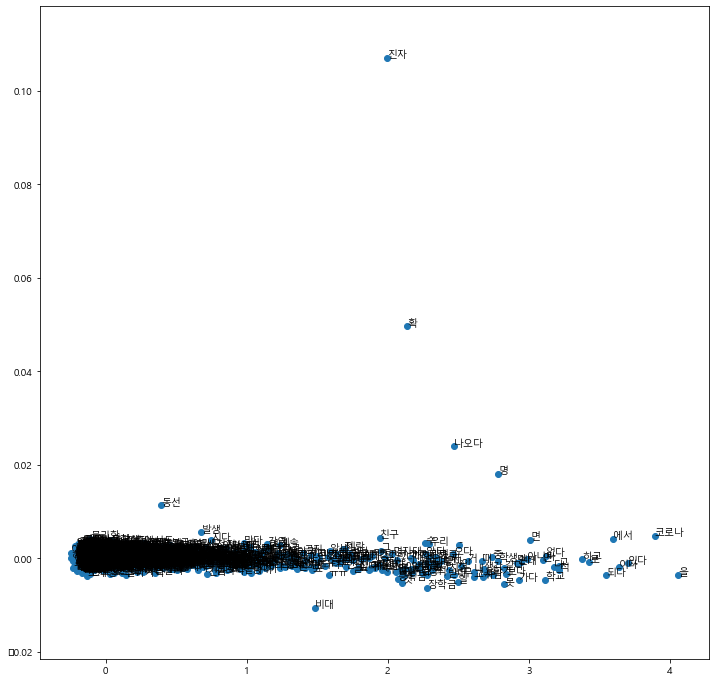

In [38]:
# 단어와 2차원 X축의 값, Y축으로 2차원 그래프를 그린다.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.scatter(xs, ys, marker = 'o')
for i,v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))

In [39]:
print(model.wv.most_similar("온라인"))

[('로', 0.9998501539230347), ('고', 0.9998455047607422), ('되다', 0.9998453855514526), ('나', 0.9998442530632019), ('적', 0.999842643737793), ('다', 0.9998416304588318), ('아니다', 0.9998409748077393), ('하고', 0.9998407959938049), ('있다', 0.9998396039009094), ('오다', 0.9998396039009094)]
